### Predicting whether a person has Heart Disease or not using Machine Learning

#### We are going to cover the following approach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition

#### In a nutshell
> Given Clinical parameters of the patient can we predict whether a person has Heart Disease or not?

### 2. Data

#### Source (taken from UCI) : https://archive.ics.uci.edu/ml/datasets/heart+Disease

#### Lets have a look at the Attributes

1. age
2. sex
3. cp
4. trestbps
5. chol
6. fbs
7. restecg
8. thalach
9. exang
10. oldpeak
11. slope
12. ca
13. thal
14. target (the predicted attribute)


### 3. Evaluation :

#### What defines Success? 

#### If we achieve 95% accuracy in predicting whether a  person has Heart Disease or not, only then will the project be persuaded

### 4. Features

#### Details about the Data

##### Data Dictionary :

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
>  1. Value 1: typical angina
>  2. Value 2: atypical angina
>  3. Value 3: non-anginal pain
>  4. Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
>  1. Value 0: normal
>  2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
>  3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
>  1. Value 1: upsloping
>  2. Value 2: flat
>  3. Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0-Not Heart Disease, 1-Heart Disease 

### A. Preparing the tools 

#### A1. Importing various Libraries 

In [1]:
#For EDA (Exploratory Data Analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, plot_roc_curve

#### A2. Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### B. Data Exploration (Exploratory Data Analysis or EDA)
1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types
3. What's missing from the data aand how do we deal with it
4. Where are the outliers and why should you care about them
5. How can you add, change or remove features to make your data more meaningful and to get more out of it

In [7]:
#Lets check the total number of values in each class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

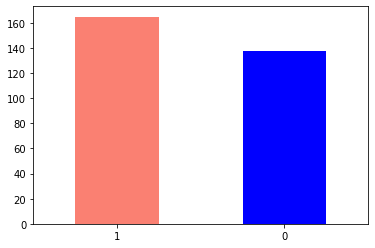

In [21]:
#Lets visualise the classes to get a better understanding
df['target'].value_counts().plot.bar(color = ['salmon', 'blue'] )
#or df['target'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0); # To rotate the xtick labels 

### B1. Basic info about our dataset

In [27]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### B2. Now lets Correlate and extract some information from our data to help undersatnd relationships between various features

> ### B2.1 Sex Vs Target

In [30]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [39]:
# Comparing target column with sex column
mat = pd.crosstab(df.target, df.sex)
mat
#or pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


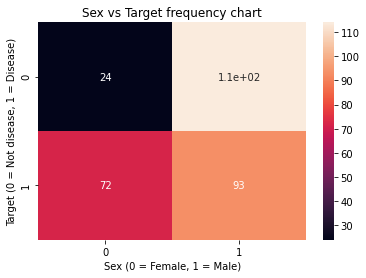

In [65]:
#Plotting it on a heatmap
sns.heatmap(mat, annot = True, cbar = True,)
plt.title('Sex vs Target frequency chart')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Target (0 = Not disease, 1 = Disease)');

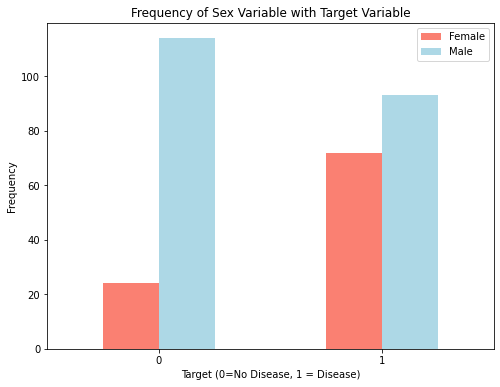

In [68]:
pd.crosstab(df.target,df.sex).plot(kind = 'bar', color = ['salmon','lightblue'], figsize = (8,6))
plt.xticks(rotation = 0)
plt.title('Frequency of Sex Variable with Target Variable')
plt.xlabel('Target (0=No Disease, 1 = Disease)')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male']);

> ### B2.2 Age vs thalach for Heart Disease (i-e for target = 1)

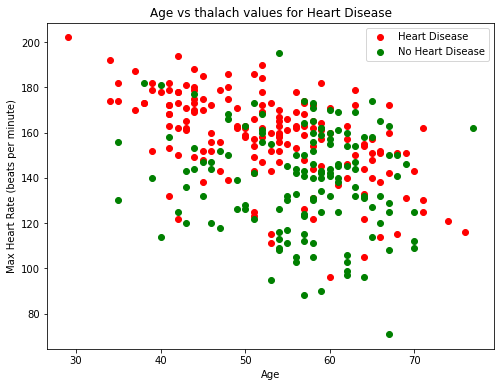

In [86]:
plt.figure(figsize = (8,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c = 'red')
plt.title('Age vs thalach values for Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (beats per minute)')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c= 'green')
plt.legend(['Heart Disease', 'No Heart Disease']);

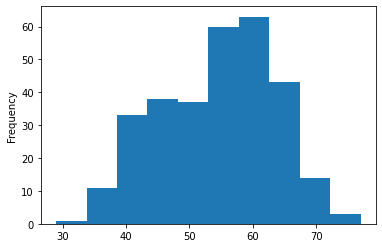

In [89]:
df['age'].plot.hist();

In [90]:
# Looks like a normal distribution curve

>### B2.3 Chest pain type for Heart Disease

In [91]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [93]:
df.cp[df.target==1].value_counts()

2    69
1    41
0    39
3    16
Name: cp, dtype: int64

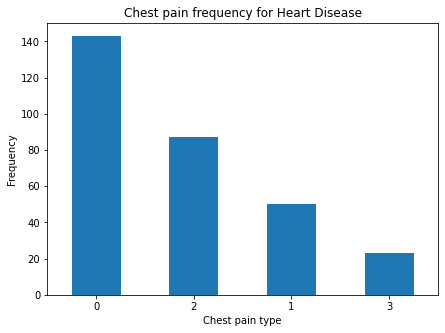

In [119]:
df.cp.value_counts().plot.bar(figsize = (7,5));
plt.xticks(rotation = 0)
plt.title('Chest pain frequency for Heart Disease')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency');

In [120]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


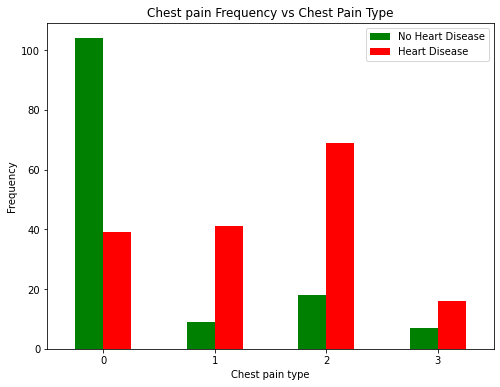

In [136]:
pd.crosstab(df.cp, df.target).plot.bar(figsize = (8,6), color = ['green', 'red']);
plt.title('Chest pain Frequency vs Chest Pain Type')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation = 0);

### C. Correlation Matrix

In [137]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


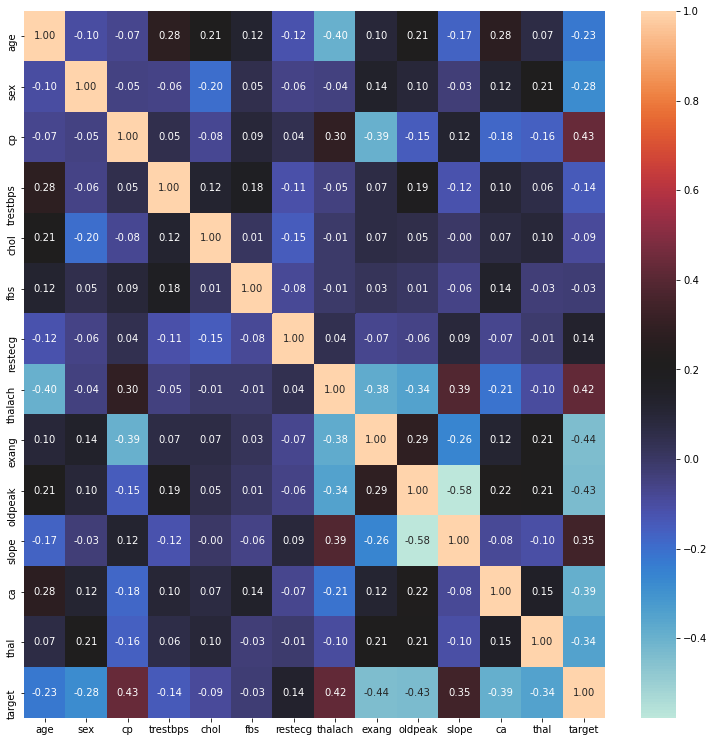

In [158]:
correlation_matrix = df.corr()
fig,ax = plt.subplots(figsize = (13,13))
ax = sns.heatmap(correlation_matrix, annot = True, cbar = True, fmt = ".2f",cmap = 'icefire')

#or plt.figure(figsize=(13,13))
#sns.heatmap(correlation_matrix, annot = True, cbar = True, fmt = ".2f",cmap = 'icefire');

# We know the concept of correlation right? ( (0,1)-Direct reletation, 0-No relation, (-1,0)-Inverse relation)

### 5.Modelling

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Lets define our feature Variables and Target Variable
X = df.drop('target', axis = 1)
y = df.target

In [6]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
# Splitting our Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Now we have split our data into training and testing set

We will train the model (finding patterns) on the train set

And we will test the model (evaluate recognised patterns) on test set

We will look at 3 Machine learning models and try them out

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [51]:
#We will create a dictionary to store our models and create a function to fit and score our model

models = {'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()}

def fit_and_score(models, X_train,X_test, y_train, y_test):
    """
    Fits and Scores the model
    X_train = Train set (Feature variables)
    X_test = Test set (Feature variables)
    y_train = Train set (Target Variable)
    y_test = Test set (Target Variable)
    """
    np.random.seed(42)
    score = {}
    for key, value in models.items():
        value.fit(X_train, y_train)
        score[key] = value.score(X_test, y_test)
    return score

def print_score(score):
    """
    Prints the score evaluated by our models
    """
    print(f"The Score for Logistic Regression Model is: {score['Logistic Regression']*100:.2f}%")
    print(f"The Score for K-Neighbors Classifier is : {score['KNN']*100:.2f}%")
    print(f"The score for Random Forest Classifier is {score['Random Forest']*100:.2f}%")

In [52]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
print_score(model_scores)

C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Score for Logistic Regression Model is: 88.52%
The Score for K-Neighbors Classifier is : 67.21%
The score for Random Forest Classifier is 91.80%


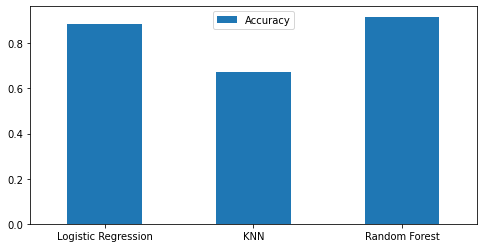

In [65]:
model_score_df = pd.DataFrame(model_scores, index = ['Accuracy'])
model_score_df.T.plot.bar(rot = 0, figsize = (8,4))
#model_score_df.T indicates transpose of that dataframe
plt.legend(loc ='best');

We got our baseline model and we have to improve it now and evaluate it

Lets look at the following evaluation metrics:
* Hyperparameter tuning
* Feature importance 


* Specific to Classification model
> 1. Confuison Matrix
> 2. Cross Validation
> 3. Precision
> 4 .Recall
> 5. F1 score
> 6. Classification Report
> 7. ROC Curve
> 8. Area Under Curve


### Hyperparameter Tuning
#### KNN

In [69]:
models['KNN'].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [87]:
# Lets tune KNN by tuning a list of n_neighbors' hyperparameter (By Hand)

train = []
test = []

for i in range(1,21):
    models['KNN'].set_params(n_neighbors = i)
    models['KNN'].fit(X_train, y_train)
    k = models['KNN'].score(X_train, y_train)
    train.append(k)
    l = models['KNN'].score(X_test, y_test)
    test.append(l)

The Maximum Training Efficiency on KNN model is 100.00%
The Maximum Testing Efficiency on KNN model is 68.85%


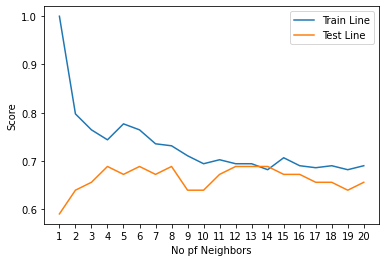

In [88]:
neighbors = range(1,21)
plt.plot(neighbors, train)
plt.plot(neighbors, test)
plt.xticks(range(1,21,1))
plt.xlabel('No pf Neighbors')
plt.ylabel('Score')
plt.legend(['Train Line', 'Test Line'])
print(f"The Maximum Training Efficiency on KNN model is {max(train)*100:.2f}%")
print(f"The Maximum Testing Efficiency on KNN model is {max(test)*100:.2f}%")

    Slight increase in score of KNN from 67.21 to 68.85 by adjusting the n_neighbors hyperparameter

At this point it is obvious that we should cut KNN model because we need a min of 95% accuracy and we are not even near that in KNN model instead Random Forest or Logistic Regression seem apt for the job

But still let us see if KNN can be further imprroved by RandomizedSearchCV and GridSearchCV

In [89]:
grid = {'algorithm': ['auto','ball_tree', 'kd_tree'],
 'metric': ['minkowski', 'euclidian','wminkowski'],
 'n_neighbors': [14],
 'p': [1,2],
 'weights': ['uniform','distance']} 

knn = models['KNN']
rs_knn = RandomizedSearchCV(estimator = knn,
                           param_distributions = grid,
                           n_iter = 10,
                           verbose = 2,
                           cv = 5)
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=wminkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=wminkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=wminkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=wminkowski, n_neighbors=14, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metri

C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 499, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1063, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn\neighbors\_dist_metrics.pyx", line 289, in sklearn.neighbors._dist_metrics.DistanceMetric.get_metric
  File "sklearn\neighbors\_dist_metrics.pyx", line 612, in sklearn.neighbors

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'metric': ['minkowski', 'euclidian',
                                                   'wminkowski'],
                                        'n_neighbors': [14], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [92]:
rs_knn.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 14,
 'metric': 'minkowski',
 'algorithm': 'auto'}

In [97]:
grid2 = {'weights': ['distance'],
 'p': [1],
 'n_neighbors': [14,20,30],
 'metric': ['minkowski','euclidian'],
 'algorithm': ['auto']}

knn_2 = models['KNN']

gs_knn = GridSearchCV(estimator = knn_2,
                     param_grid = grid2,
                     verbose = 2,
                     cv = 5)

gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=14, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric

C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 399, in _fit
    self._check_algorithm_metric()
  File "C:\Users\abhi2\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 342, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'euclidian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a calla

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=20),
             param_grid={'algorithm': ['auto'],
                         'metric': ['minkowski', 'euclidian'],
                         'n_neighbors': [14, 20, 30], 'p': [1],
                         'weights': ['distance']},
             verbose=2)

### Lets Check the Score

In [100]:
gs_knn.score(X_test, y_test), rs_knn.score(X_test, y_test)

(0.6721311475409836, 0.6885245901639344)

### Thats too low we are discarding KNN
### KNN - Bhag Teri Ma ki ****

### Hyperparameter tuning for Logistic Regression and Random Forest Classifier using RandomizedSearchCV and GridSearchCV

In [22]:
log_grid_1 = {'C' : np.logspace(-4,-4,20),
              'solver' : ['liblinear']}

rfc_grid_1 = {'n_estimators' : np.arange(10,1000,50),
              'max_depth' : [None, 3, 5, 10],
              'min_samples_split' : np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,20,2)}

log_reg = LogisticRegression()
rfc = RandomForestClassifier()

np.random.seed(231)
rs_log_reg = RandomizedSearchCV(estimator = log_reg,
                               param_distributions = log_grid_1,
                               cv = 10, verbose = True,
                               n_iter = 10)

rs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [24]:
rs_log_reg.score(X_test, y_test)

0.7213114754098361

### Lets check for Random Forest Classifier

In [31]:
np.random.seed(43)
rs_rfc = RandomizedSearchCV(estimator = rfc,
                               param_distributions = rfc_grid_1,
                               cv = 10, verbose = True,
                               n_iter = 20)

rs_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_rfc.score(X_test,y_test)

0.819672131147541

In [43]:
np.random.seed(42)
log_grid_2 = {'C' : np.logspace(-4,-4,30),
              'solver' : ['liblinear']}

rfc_grid_2 = {'n_estimators' : np.arange(10,500,50),
              'max_depth' : [None, 3],
              'min_samples_split' : np.arange(2,6,2),
              'min_samples_leaf' : np.arange(1,6,2)}

gs_log_reg = GridSearchCV(estimator = log_reg,
                        param_grid = log_grid_2,
                        cv = 10, verbose = True,)

gs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.score(X_test, y_test)

0.7213114754098361

In [44]:
gs_rfc = GridSearchCV(estimator = rfc,
                        param_grid = rfc_grid_2,
                        cv = 10, verbose = True,)

gs_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             verbose=True)

In [45]:
gs_rfc.score(X_test, y_test)

0.819672131147541

I think we cannot experiment for more hyperparameters because of time constraints
so we will go with our logistic regression model

## Evaluating our tuned Model beyond Accuracy

1. ROC Curve and AUC score
2. Confusion Matrix
3. Classification Report
4. Precision
5. Recall
6. F1 Score

### A1. ROC CURVE

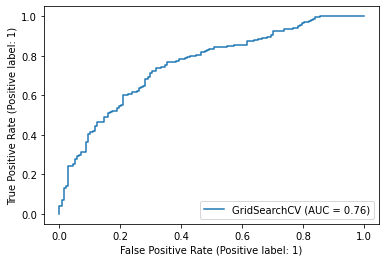

In [65]:
plot_roc_curve(gs_log_reg, X, y);

### A2. Confusion Matrix

In [51]:
y_preds = gs_log_reg.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[14, 13],
       [ 4, 30]], dtype=int64)

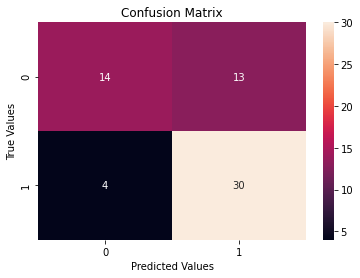

In [64]:
fig, ax = plt.subplots(figsize = (6,4))
sns.heatmap(conf_mat, annot = True)
ax.set(title = 'Confusion Matrix', xlabel = 'Predicted Values', ylabel = 'True Values');

In [57]:
y_preds, np.array(y_test)

(array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64),
 array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64))

### A3. Classification Report

In [61]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.52      0.62        27
           1       0.70      0.88      0.78        34

    accuracy                           0.72        61
   macro avg       0.74      0.70      0.70        61
weighted avg       0.73      0.72      0.71        61



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [63]:
pd.DataFrame(classification_report(y_test,y_preds, output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.777778,0.697674,0.721311,0.737726,0.733130
recall,0.518519,0.882353,0.721311,0.700436,0.721311
f1-score,0.622222,0.779221,0.721311,0.700722,0.709730
support,27.000000,34.000000,0.721311,61.000000,61.000000


### From Classification report we get the precision recall and f1 score but we have to use cross validation wherever possible as we could have got an unlucky split :/ so lets verify by Cross Validation

#### Lets choose model with best params

In [66]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

### A4. Cross Validated Accuracy Score

In [74]:
log_reg_cv = LogisticRegression(solver = 'liblinear', C = 0.0001)
acc_score = cross_val_score(log_reg_cv, X, y, cv = 10, scoring = None)
print(acc_score)
acc_score.mean()

[0.61290323 0.67741935 0.61290323 0.7        0.9        0.66666667
 0.73333333 0.7        0.66666667 0.66666667]


0.6936559139784947

### A5. Precision Score

In [77]:
prec_score = cross_val_score(log_reg_cv, X, y, cv = 10, scoring = 'precision')
print(prec_score)
prec_score.mean()

[0.6        0.70588235 0.64705882 0.66666667 0.85       0.66666667
 0.78571429 0.66666667 0.66666667 0.66666667]


0.6921988795518208

### A6. Recall Score

In [78]:
rec_score = cross_val_score(log_reg_cv, X, y, cv = 10, scoring = 'recall')
print(rec_score)
rec_score.mean()

[0.88235294 0.70588235 0.64705882 0.94117647 1.         0.75
 0.6875     0.875      0.75       0.75      ]


0.7988970588235295

### A7. F1 Score

In [79]:
f1_score = cross_val_score(log_reg_cv, X, y, cv = 10, scoring = 'f1')
print(f1_score)
f1_score.mean()

[0.71428571 0.70588235 0.64705882 0.7804878  0.91891892 0.70588235
 0.73333333 0.75675676 0.70588235 0.70588235]


0.7374370763466891

### Lets Visualize our cross validated score 

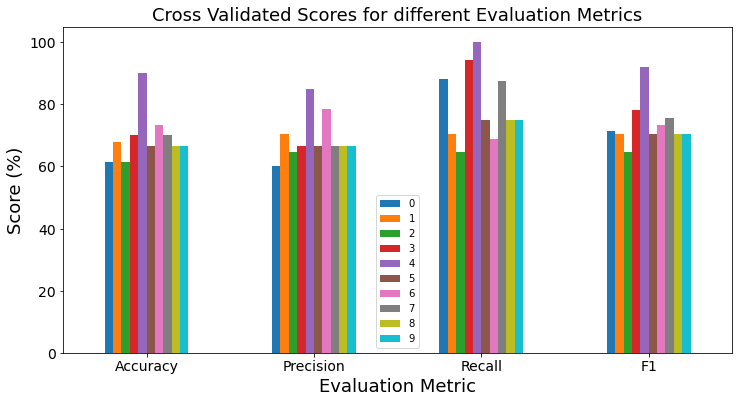

In [96]:
cv_scores = {'Accuracy' : acc_score*100,
             'Precision' : prec_score*100,
             'Recall' : rec_score*100,
             'F1' : f1_score*100}

cross_validates_scores = pd.DataFrame(cv_scores)
cross_validates_scores.T.plot.bar(figsize = (12,6))
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Evaluation Metric', fontsize = 18)
plt.ylabel('Score (%)', fontsize = 18)
plt.title('Cross Validated Scores for different Evaluation Metrics', fontsize = 18);

In [85]:
cross_validates_scores

,Accuracy,Precision,Recall,F1
0,0.612903,0.600000,0.882353,0.714286
1,0.677419,0.705882,0.705882,0.705882
2,0.612903,0.647059,0.647059,0.647059
3,0.700000,0.666667,0.941176,0.780488
4,0.900000,0.850000,1.000000,0.918919
5,0.666667,0.666667,0.750000,0.705882
6,0.733333,0.785714,0.687500,0.733333
7,0.700000,0.666667,0.875000,0.756757
8,0.666667,0.666667,0.750000,0.705882
9,0.666667,0.666667,0.750000,0.705882


## Feature Importance

* Feature importance gives us the value of how the ML model is modelling each feature variable with target variable that is, which feature is given more weight and which is given less or which feature is more important and helpful in determining the target variable by the model
* Of course the feature importance varies from model to model 
* We can use coef_ to find this measure of feature importance given by the ML model more or less it is similar to correlation but ML driven Correlation

In [101]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [106]:
log_reg_feat = LogisticRegression(solver = 'liblinear', C = 0.0001)
log_reg_feat.fit(X_train, y_train)

LogisticRegression(C=0.0001, solver='liblinear')

### Coefficient array,  `model.coef_`

In [107]:
log_reg_feat.coef_

array([[-0.00678295, -0.0016318 ,  0.00446583, -0.01695038, -0.00329176,
         0.00013974,  0.00040773,  0.02432685, -0.0020888 , -0.00456645,
         0.00170165, -0.00352173, -0.00279845]])

In [108]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [112]:
feature_dict = dict(zip(df.columns, list(log_reg_feat.coef_[0])))
feature_dict

{'age': -0.006782947052350463,
 'sex': -0.0016317974237950719,
 'cp': 0.0044658308567277405,
 'trestbps': -0.016950379360572112,
 'chol': -0.0032917620595624805,
 'fbs': 0.00013974461725315356,
 'restecg': 0.0004077346997387179,
 'thalach': 0.02432685243746481,
 'exang': -0.002088800386157698,
 'oldpeak': -0.004566453884164545,
 'slope': 0.0017016501307571864,
 'ca': -0.0035217296199271894,
 'thal': -0.0027984466773310636}

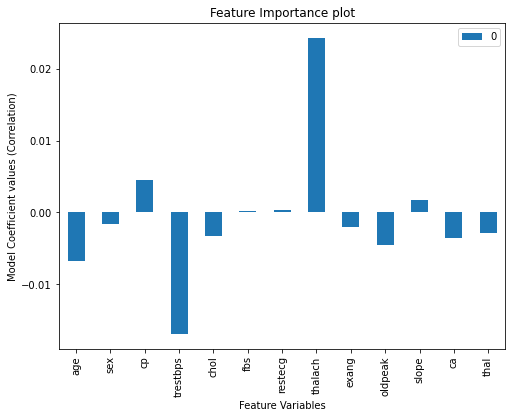

In [135]:
pd.DataFrame(feature_dict, index = [0]).T.plot.bar(figsize = (8,6))
ax = plt.gca()
ax.set(ylabel = 'Model Coefficient values (Correlation)')
ax.set(xlabel = 'Feature Variables')
ax.set(title = 'Feature Importance plot');

In [120]:
pd.DataFrame(feature_dict, index = [0]).T

,0
age,-0.006783
sex,-0.001632
cp,0.004466
trestbps,-0.016950
chol,-0.003292
fbs,0.000140
restecg,0.000408
thalach,0.024327
exang,-0.002089
oldpeak,-0.004566


In [121]:
pd.DataFrame(feature_dict, index = [0])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.006783,-0.001632,0.004466,-0.01695,-0.003292,0.00014,0.000408,0.024327,-0.002089,-0.004566,0.001702,-0.003522,-0.002798


### 6. Experimentation
* Until now we haven't reached our goal of 95% accuracy :/ so we should ask the folowing questions:
> 1. Could we collect more data?
> 2. Could we improve our model?
> 3. Could we experiment with more models (like CatBoost or XGBoost)?

* Until now whatever we have done is nothing but experimentation and we may continue to experiment to answer the above questions and reach our aim 